<a href="https://colab.research.google.com/github/Ruqyai/Course-DS/blob/master/houses_prices_ytechsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Learning Objectives:

 
* Formulate  the problem
* Load the Data
* Data Exploration
* Clean The Data
* Discover and Visualize the Data to Gain Insights
* Looking for Correlations
* Prepare the Data for Machine Learning Algorithms
* Save Cleaned Data and Download it



#Houses prices

<h3>About Data </h3>

The dataset consisted of historic data of houses sold between May 2014 to May 2015.

The dataset consisted of 21 variables and 21613 observations.

[more info](https://www.kaggle.com/shivachandel/kc-house-data)

#Formulate  the problem

We want to predict the prices of houses

So How predict the prices of houses?!!

Notice the data is labeled (**Supervised Learning**)

Notice the desired output is number (**Regression**)






###Import libraries




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Load the Data

###Load the dataset

In [2]:
file_path = 'https://raw.githubusercontent.com/Ruqyai/Course-DS/master/raw_kc_house_data.csv'

In [3]:
#Use the Pandas method read_csv() to load the data from the web address.
df = pd.read_csv(file_path)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Old,New
0,7129300520,20141013T000000,221900.0,NaN,NaN,1180,5650.0,1,?,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,yes,yes
1,6414100192,20141209T000000,538000.0,3.0,2.0,2570,7242.0,2,?,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,yes,yes
2,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000.0,1,0,0.0,3,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,yes,yes
3,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000.0,1,0,0.0,5,7,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000,yes,yes
4,1954400510,20150218T000000,510000.0,3.0,2.0,1680,8080.0,1,0,0.0,3,8,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,1523300141,20140623T000000,402101.0,2.0,1.0,1020,1350.0,2,0,0.0,3,7,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007,no,no
21611,291310100,20150116T000000,400000.0,3.0,3.0,1600,2388.0,2,0,0.0,3,8,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287,no,no
21612,1523300157,20141015T000000,325000.0,2.0,1.0,1020,1076.0,2,0,0.0,3,7,1020,0,2008,0.0,98144,47.5941,-122.299,1020,1357,no,no
21613,291310100,20150116T000000,400000.0,3.0,3.0,1600,2388.0,2,0,0.0,3,8,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287,no,no


#Data Exploration

##Take a Quick Look at the Data Structure

In [4]:
#Use the method head() to display the first five rows of the dataframe.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Old,New
0,7129300520,20141013T000000,221900.0,NaN,NaN,1180,5650.0,1,?,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,yes,yes
1,6414100192,20141209T000000,538000.0,3.0,2.0,2570,7242.0,2,?,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,yes,yes
2,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000.0,1,0,0.0,3,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,yes,yes
3,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000.0,1,0,0.0,5,7,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000,yes,yes
4,1954400510,20150218T000000,510000.0,3.0,2.0,1680,8080.0,1,0,0.0,3,8,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503,yes,yes


#Clean  the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21615 entries, 0 to 21614
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21615 non-null  int64  
 1   date           21615 non-null  object 
 2   price          21615 non-null  float64
 3   bedrooms       21612 non-null  float64
 4   bathrooms      21612 non-null  float64
 5   sqft_living    21615 non-null  int64  
 6   sqft_lot       21613 non-null  float64
 7   floors         21615 non-null  int64  
 8   waterfront     21615 non-null  object 
 9   view           21613 non-null  float64
 10  condition      21615 non-null  int64  
 11  grade          21615 non-null  int64  
 12  sqft_above     21615 non-null  int64  
 13  sqft_basement  21615 non-null  int64  
 14  yr_built       21615 non-null  int64  
 15  yr_renovated   21352 non-null  float64
 16  zipcode        21615 non-null  int64  
 17  lat            21611 non-null  float64
 18  long  


##Missing  Values


#Identify and handle missing values

As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis. 
<div>So, how do we identify all those missing values and deal with them?</div> 


<h1>How to work with missing data?</h1>

Steps for working with missing data:
<ol>
    <li>identify missing data</li>
    <li>deal with missing data</li>
    <li>correct data format</li>
</ol>

<h1 id="identify_missing_values">1. Identify missing values</h1>

In [6]:
df.isnull().sum()

id                   0
date                 0
price                0
bedrooms             3
bathrooms            3
sqft_living          0
sqft_lot             2
floors               0
waterfront           0
view                 2
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated       263
zipcode              0
lat                  4
long                 0
sqft_living15        0
sqft_lot15           0
Old              19734
New              19734
dtype: int64

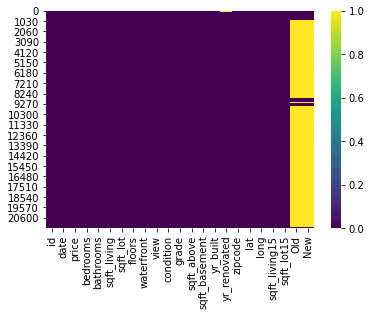

In [7]:
# Check if there is any missing value
sns.heatmap(df.isnull(), cmap='viridis')

   
   <h4>Convert "?" to NaN</h4>In the house dataset, missing data comes with the question mark "?".We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Here we use the function:  <pre>.replace(A, B, inplace = True) </pre>to replace A by B




In [8]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Old,New
0,7129300520,20141013T000000,221900.0,NaN,NaN,1180,5650.0,1,NaN,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,yes,yes
1,6414100192,20141209T000000,538000.0,3.0,2.0,2570,7242.0,2,NaN,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,yes,yes
2,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000.0,1,0,0.0,3,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,yes,yes
3,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000.0,1,0,0.0,5,7,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000,yes,yes
4,1954400510,20150218T000000,510000.0,3.0,2.0,1680,8080.0,1,0,0.0,3,8,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503,yes,yes
5,7237550310,20140512T000000,1230000.0,4.0,5.0,5420,101930.0,1,0,0.0,3,11,3890,1530,2001,NaN,98053,47.6561,-122.005,4760,101930,yes,yes
6,1321400060,20140627T000000,257500.0,NaN,2.0,1715,6819.0,2,0,0.0,3,7,1715,0,1995,NaN,98003,47.3097,-122.327,2238,6819,yes,yes
7,2008000270,20150115T000000,291850.0,NaN,2.0,1060,9711.0,1,0,0.0,3,7,1060,0,1963,NaN,98198,47.4095,-122.315,1650,9711,yes,yes
8,2414600126,20150415T000000,229500.0,3.0,1.0,1780,7470.0,1,0,0.0,3,7,1050,730,1960,NaN,98146,47.5123,-122.337,1780,8113,yes,yes
9,3793500160,20150312T000000,323000.0,3.0,3.0,1890,6560.0,2,0,0.0,3,7,1890,0,2003,NaN,98038,47.3684,-122.031,2390,7570,yes,yes


<h1 id="deal_missing_values">2. Deal with missing data</h1>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on inference or other functions 
    </li>
</ol>

<h3>Drop the whole row</h3>

In [9]:
# lat we have 4 NaN
# simply drop whole row with NaN 
df.dropna(subset=["lat"], axis=0, inplace=True) 


<h3>Drop the whole column</h3>

In [10]:
# yr_renovated we have 263 NaN
# simply drop whole yr_renovated column with NaN 
df.drop(["yr_renovated"], axis=1, inplace=True)

<h3> Replace it by mean </h3>

In [11]:
# sqft_lot we have 2 NaN
df['sqft_lot']=df['sqft_lot'].fillna(df['sqft_lot'].mean())
# After Replacing
df['sqft_lot'].isnull().sum()

0

<h3>Replace by frequency</h3>

To see which values are present in a particular column, we can use the ".value_counts()" method:

In [12]:
# bathrooms we have 3 NaN
df['bathrooms'].value_counts()

2.0    8469
3.0    7907
1.0    3935
4.0    1100
5.0     157
6.0      22
0.0      10
7.0       4
8.0       4
Name: bathrooms, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [13]:
df['bathrooms']=df['bathrooms'].fillna(df['bathrooms'].value_counts().idxmax())
# After Replacing
df['bathrooms'].isnull().sum()

0

<h3>Replace it based on inference or other functions</h3>

In [14]:
df['Old'].fillna("yes", inplace = True) 
# After Replacing
df['Old'].isnull().sum()

0

<h3> Replace by sklearn.impute </h3>

In [15]:
# view we have 2 NaN
#import numpy as np
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='median')# mean , median , most_frequent , (constant ==fill_value)
df['view'] = imr.fit_transform(df[['view']])

# After impute
df['view'].isnull().sum()

0

In [16]:
# bedrooms we have 3 NaN

imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')# mean , median , most_frequent , (constant ==fill_value)
df['bedrooms'] = imr.fit_transform(df[['bedrooms']])

# After impute
df['bedrooms'].isnull().sum()

0

<h1 id="correct_data_format">3. Correct data format</h1>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use 
<p><b>.dtype</b> to check the data type</p>
<p><b>.astype</b> to change the data type</p>

In [17]:
df['sqft_living'].dtypes

dtype('int64')

In [18]:
df['sqft_living'] = df['sqft_living'].astype("float")

In [19]:
df['sqft_living'].dtype

dtype('float64')

<h2 id="indicator">Indicator variable (or dummy variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>
<p>
    because we cannot use categorical variables for regression analysis as string.
</p>

In [20]:
df['Old'].unique()

array(['yes', 'no', 'TRUE', 'FALSE', 'NO', 'YES'], dtype=object)

In [21]:
dummy_variable = pd.get_dummies(df["New"], prefix="New")
dummy_variable

,New_FALSE,New_NO,New_TRUE,New_YES,New_no,New_yes
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
21610,0,0,0,0,1,0
21611,0,0,0,0,1,0
21612,0,0,0,0,1,0
21613,0,0,0,0,1,0


In [22]:
# merge data frame "df" and "dummy_variable" 
'''
df = pd.concat([df, dummy_variable], axis=1)
df
'''

'\ndf = pd.concat([df, dummy_variable], axis=1)\ndf\n'

<h3>LabelEncoder</h3>

In [23]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in the column itself
df['New'] = labelencoder.fit_transform(df['New'].astype(str))
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Old,New
0,7129300520,20141013T000000,221900.0,3.0,2.0,1180.0,5650.0,1,NaN,0.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,yes,6
1,6414100192,20141209T000000,538000.0,3.0,2.0,2570.0,7242.0,2,NaN,0.0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,yes,6
2,5631500400,20150225T000000,180000.0,2.0,1.0,770.0,10000.0,1,0,0.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,yes,6
3,2487200875,20141209T000000,604000.0,4.0,3.0,1960.0,5000.0,1,0,0.0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,yes,6
4,1954400510,20150218T000000,510000.0,3.0,2.0,1680.0,8080.0,1,0,0.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,yes,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,1523300141,20140623T000000,402101.0,2.0,1.0,1020.0,1350.0,2,0,0.0,3,7,1020,0,2009,98144,47.5944,-122.299,1020,2007,no,5
21611,291310100,20150116T000000,400000.0,3.0,3.0,1600.0,2388.0,2,0,0.0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,1287,no,5
21612,1523300157,20141015T000000,325000.0,2.0,1.0,1020.0,1076.0,2,0,0.0,3,7,1020,0,2008,98144,47.5941,-122.299,1020,1357,no,5
21613,291310100,20150116T000000,400000.0,3.0,3.0,1600.0,2388.0,2,0,0.0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,1287,no,5


<h3>OneHotEncoder</h3>

In [24]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
One_hot_encoder = OneHotEncoder(handle_unknown='ignore')
# passing the column (label encoded values)
enc_df = pd.DataFrame(One_hot_encoder.fit_transform(df[['Old']]).toarray())
enc_df

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
21606,0.0,0.0,0.0,0.0,1.0,0.0
21607,0.0,0.0,0.0,0.0,1.0,0.0
21608,0.0,0.0,0.0,0.0,1.0,0.0
21609,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# merge with main df on key values
'''
df = df.join(enc_df)
df
'''

'\ndf = df.join(enc_df)\ndf\n'

<h3>Remove any duplicates</h3>


In [26]:
# before Removing duplicates
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Old,New
0,7129300520,20141013T000000,221900.0,3.0,2.0,1180.0,5650.0,1,NaN,0.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,yes,6
1,6414100192,20141209T000000,538000.0,3.0,2.0,2570.0,7242.0,2,NaN,0.0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,yes,6
2,5631500400,20150225T000000,180000.0,2.0,1.0,770.0,10000.0,1,0,0.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,yes,6
3,2487200875,20141209T000000,604000.0,4.0,3.0,1960.0,5000.0,1,0,0.0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,yes,6
4,1954400510,20150218T000000,510000.0,3.0,2.0,1680.0,8080.0,1,0,0.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,yes,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,1523300141,20140623T000000,402101.0,2.0,1.0,1020.0,1350.0,2,0,0.0,3,7,1020,0,2009,98144,47.5944,-122.299,1020,2007,no,5
21611,291310100,20150116T000000,400000.0,3.0,3.0,1600.0,2388.0,2,0,0.0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,1287,no,5
21612,1523300157,20141015T000000,325000.0,2.0,1.0,1020.0,1076.0,2,0,0.0,3,7,1020,0,2008,98144,47.5941,-122.299,1020,1357,no,5
21613,291310100,20150116T000000,400000.0,3.0,3.0,1600.0,2388.0,2,0,0.0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,1287,no,5


In [27]:
df = df.drop_duplicates()

In [28]:
# After Removing duplicates
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Old,New
0,7129300520,20141013T000000,221900.0,3.0,2.0,1180.0,5650.0,1,NaN,0.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,yes,6
1,6414100192,20141209T000000,538000.0,3.0,2.0,2570.0,7242.0,2,NaN,0.0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,yes,6
2,5631500400,20150225T000000,180000.0,2.0,1.0,770.0,10000.0,1,0,0.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,yes,6
3,2487200875,20141209T000000,604000.0,4.0,3.0,1960.0,5000.0,1,0,0.0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,yes,6
4,1954400510,20150218T000000,510000.0,3.0,2.0,1680.0,8080.0,1,0,0.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,yes,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,3.0,1530.0,1131.0,3,0,0.0,3,8,1530,0,2009,98103,47.6993,-122.346,1530,1509,no,5
21609,6600060120,20150223T000000,400000.0,4.0,3.0,2310.0,5813.0,2,0,0.0,3,8,2310,0,2014,98146,47.5107,-122.362,1830,7200,no,5
21610,1523300141,20140623T000000,402101.0,2.0,1.0,1020.0,1350.0,2,0,0.0,3,7,1020,0,2009,98144,47.5944,-122.299,1020,2007,no,5
21611,291310100,20150116T000000,400000.0,3.0,3.0,1600.0,2388.0,2,0,0.0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,1287,no,5


<b>Wonderful!</b>

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.



---



---



#Data Standardization
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

In [29]:
df['Old'].unique()

array(['yes', 'no', 'TRUE', 'FALSE', 'NO', 'YES'], dtype=object)

In [30]:
df.replace("TRUE", 'yes', inplace = True)
df.replace("FALSE", 'no', inplace = True)
df.replace("YES", 'yes', inplace = True)
df.replace("NO", 'no', inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [31]:
df['Old'].unique()

array(['yes', 'no'], dtype=object)

<h3> Categorical variables</h3>
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.


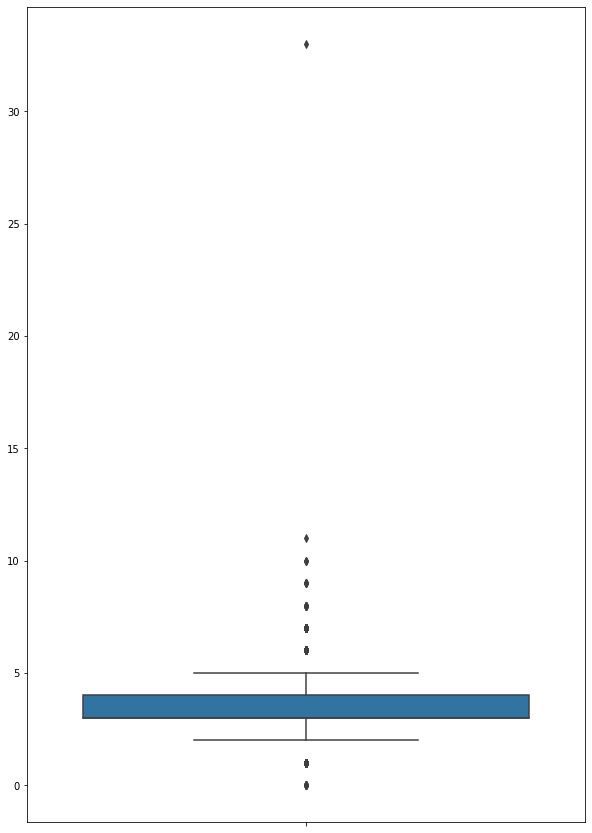

In [32]:
plt.figure(figsize=(10,15))
sns.boxplot(df['bedrooms'].values, orient='v',)

<h3>Remove outliers</h3>

In [33]:
# Remove outliers
df['bedrooms'] = df['bedrooms'].clip(2, 5)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


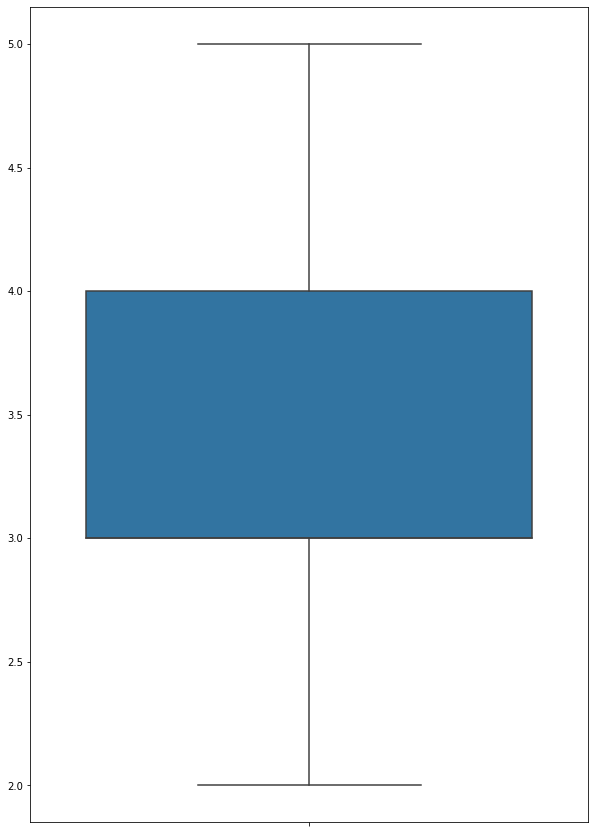

In [34]:
plt.figure(figsize=(10,15))
sns.boxplot(df['bedrooms'].values, orient='v')

#Data Normalization

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>

In [35]:
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df[['sqft_living','sqft_lot']] = min_max_scaler.fit_transform(df[['sqft_living','sqft_lot']])
df[['sqft_living','sqft_lot']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,sqft_living,sqft_lot
0,0.067170,0.003108
1,0.172075,0.004072
2,0.036226,0.005743
3,0.126038,0.002714
4,0.104906,0.004579
...,...,...
21608,0.093585,0.000370
21609,0.152453,0.003206
21610,0.055094,0.000503
21611,0.098868,0.001132


##Discover and Visualize the Data to Gain Insights

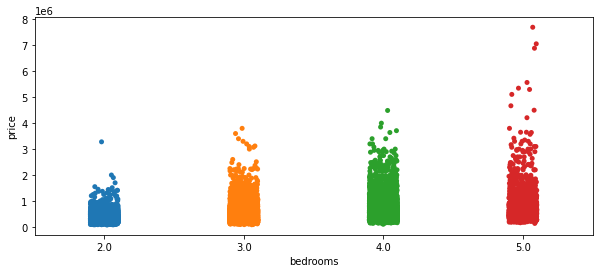

In [36]:
plt.figure(figsize=(10, 4))
sns.stripplot(x="bedrooms", y="price", data=df);

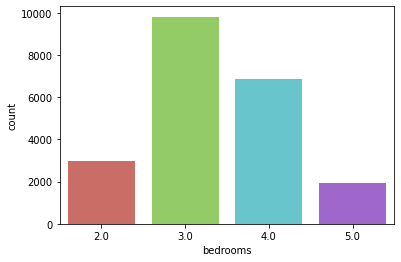

In [37]:
sns.countplot(x='bedrooms',data=df, palette='hls')

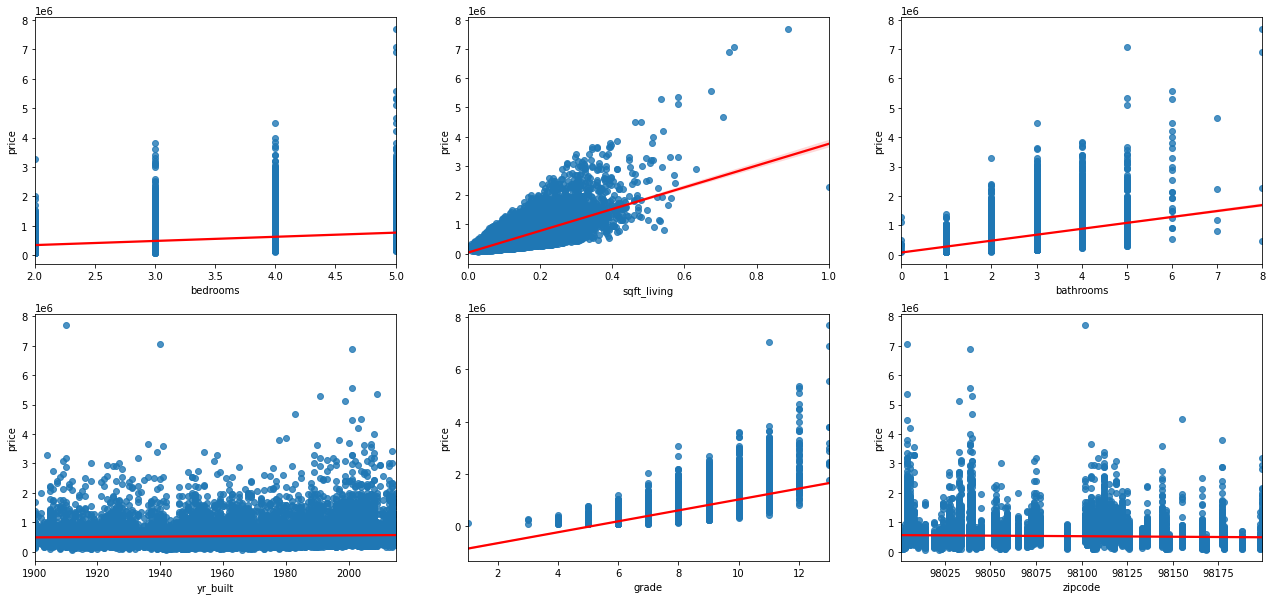

In [47]:
plt.figure(figsize=(22,10))

plt.subplot(231)#subplot to add a subplot to the current figure
sns.regplot(x='bedrooms', y='price', data=df,  line_kws={'color': 'red'}) 

plt.subplot(232)
sns.regplot(x='sqft_living', y='price', data=df , line_kws={'color': 'red'})
                    
plt.subplot(233)
sns.regplot(x='bathrooms', y='price', data=df,  line_kws={'color': 'red'})

plt.subplot(234)
sns.regplot(x='yr_built', y='price', data=df , line_kws={'color': 'red'})
          
plt.subplot(235)
sns.regplot(x='grade', y='price', data=df , line_kws={'color': 'red'})

plt.subplot(236)
sns.regplot(x='zipcode', y='price', data=df , line_kws={'color': 'red'})
                   

##Looking for Correlations

<h3>Correlation and Causation</h3>

<b> Correlation: </b> a measure of the extent of interdependence between variables.

<b> Causation: </b>the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

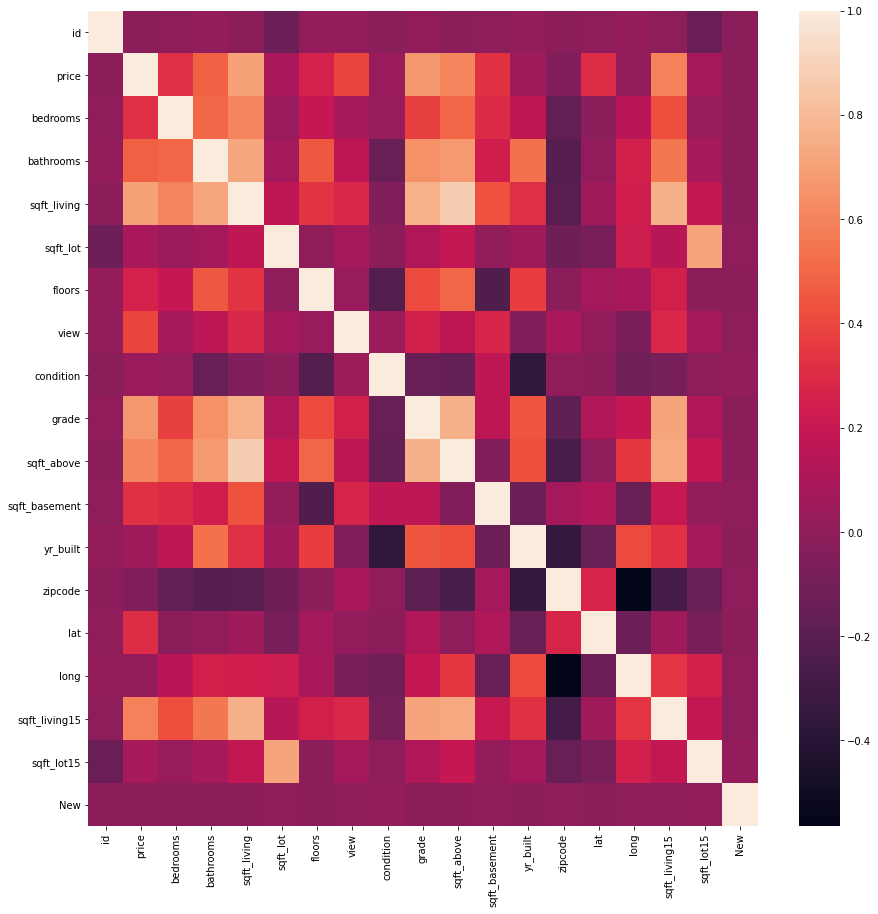

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [40]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,New
count,2.160900e+04,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,4.580425e+09,5.401881e+05,3.359896,2.312601,0.135080,0.008837,1.542413,0.234347,3.409413,7.656856,1788.344116,291.469527,1971.005831,98077.945532,47.560060,-122.213902,1986.513443,12767.957703,4.115507
std,2.876478e+09,3.673709e+05,0.827217,0.865260,0.069313,0.025093,0.567516,0.766382,0.650695,1.175395,828.040836,442.550785,29.375445,53.506150,0.138565,0.140821,685.359809,27306.212338,0.403480
min,1.000102e+06,7.500000e+04,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,2.000000,0.085811,0.002738,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.000000,0.122264,0.004301,2.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.000000
75%,7.308900e+09,6.450000e+05,4.000000,3.000000,0.170566,0.006164,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,4.000000
max,9.900000e+09,7.700000e+06,5.000000,8.000000,1.000000,1.000000,4.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,6.000000


In [41]:
print('max price : ', df['price'].max())
print('min price : ', df['price'].min())
print('mean price :',df['price'].mean())

max price :  7700000.0
min price :  75000.0
mean price : 540188.0696931834


#Feature  engineering

<h3>Conclusion: Important Variables</h3>
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the house price. 

##Select features

In [42]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Old', 'New'],
      dtype='object')

In [43]:
selected_features = ['price', 'bedrooms', 'bathrooms','sqft_living', 'grade',]
df_final = df[selected_features]
df_final

,price,bedrooms,bathrooms,sqft_living,grade
0,221900.0,3.0,2.0,0.067170,7
1,538000.0,3.0,2.0,0.172075,7
2,180000.0,2.0,1.0,0.036226,6
3,604000.0,4.0,3.0,0.126038,7
4,510000.0,3.0,2.0,0.104906,8
...,...,...,...,...,...
21608,360000.0,3.0,3.0,0.093585,8
21609,400000.0,4.0,3.0,0.152453,8
21610,402101.0,2.0,1.0,0.055094,7
21611,400000.0,3.0,3.0,0.098868,8


<h3>Save Cleaned Data and Download it <h3>

In [44]:
df_final.to_csv('cleaned_data.csv')

In [45]:
from google.colab import files
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Choose and  fit model
We will continue tomorrow ...

